# IMPORTS

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../.."))       # for 'protonet_mnist_add_utils' folder
sys.path.append(os.path.abspath("../../.."))    # for 'data' folder
sys.path.append(os.path.abspath("../../../..")) # for 'models' and 'datasets' folders

print(sys.path)

['/users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks', '/users-1/eleonora/anaconda3/envs/luca-rs/lib/python38.zip', '/users-1/eleonora/anaconda3/envs/luca-rs/lib/python3.8', '/users-1/eleonora/anaconda3/envs/luca-rs/lib/python3.8/lib-dynload', '', '/users-1/eleonora/anaconda3/envs/luca-rs/lib/python3.8/site-packages', '/users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation', '/users-1/eleonora/reasoning-shortcuts/IXShort', '/users-1/eleonora/reasoning-shortcuts']


In [2]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as T

from ultralytics import YOLO

from argparse import Namespace
from datasets import get_dataset
from datasets.utils.base_dataset import BaseDataset

%matplotlib inline

# MODEL

In [3]:
my_yolo_path = "ultralytics/"
my_premodel_path = "ultralytics/pretrained/yolo11n.pt"
my_finetuned_path = "ultralytics/finetuned/yolo_kand_finetuned.pt"

model = YOLO(my_premodel_path)

# TRAINING

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BASE_DIR = os.getcwd()
yaml_path = os.path.join(BASE_DIR, "data/kand_config_yolo.yaml")
results = model.train(data=yaml_path, epochs=100, imgsz=64, project=my_yolo_path)
results = model.val(data=yaml_path, split="test", project=my_yolo_path)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=ultralytics/pretrained/yolo11n.pt, data=/users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/data/kand_config_yolo.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=ultralytics/, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

train: Scanning /users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/data/kand_yolo_dataset/train/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]
val: Scanning /users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/data/kand_yolo_dataset/val/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to ultralytics/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 6 dataloader workers
Logging results to ultralytics/train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.156G      1.832      3.505      1.158         68         64: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         12         36     0.0249      0.167     0.0145    0.00969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.156G      1.368       3.22      1.013         90         64: 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all         12         36     0.0337      0.306     0.0467     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.156G      1.291      2.827      0.983         59         64: 100%|██████████| 13/13 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]

                   all         12         36     0.0723          1      0.122     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.156G      1.353       2.27     0.9606         62         64: 100%|██████████| 13/13 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all         12         36          1      0.127      0.492      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.156G      1.359       1.75     0.9487         73         64: 100%|██████████| 13/13 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.20it/s]

                   all         12         36       0.87      0.373      0.867      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.156G      1.434       1.36     0.9389         76         64: 100%|██████████| 13/13 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.33it/s]

                   all         12         36      0.936      0.889      0.972      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.156G      1.391       1.03     0.9259         68         64: 100%|██████████| 13/13 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all         12         36      0.853      0.964      0.943      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.156G       1.26     0.8842     0.9172         87         64: 100%|██████████| 13/13 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all         12         36      0.922          1      0.937      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.156G      1.161     0.7783     0.9165         75         64: 100%|██████████| 13/13 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all         12         36      0.895          1      0.969      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.156G      1.088     0.7007     0.9115         83         64: 100%|██████████| 13/13 [00:01<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all         12         36       0.98          1      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.156G      1.025     0.6577     0.9056         89         64: 100%|██████████| 13/13 [00:01<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.38it/s]

                   all         12         36      0.931          1      0.991       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.156G      1.014     0.6178     0.9105         82         64: 100%|██████████| 13/13 [00:01<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.78it/s]

                   all         12         36      0.992          1      0.995      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.156G       1.02     0.6031     0.9054         72         64: 100%|██████████| 13/13 [00:01<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all         12         36      0.995          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.156G      0.959     0.5835     0.9095         94         64: 100%|██████████| 13/13 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all         12         36      0.997          1      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.156G      1.001      0.552     0.9017         73         64: 100%|██████████| 13/13 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all         12         36      0.995          1      0.995      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.156G     0.9841     0.5432     0.9057         72         64: 100%|██████████| 13/13 [00:01<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.44it/s]

                   all         12         36      0.997          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.156G     0.9012     0.5179       0.89         73         64: 100%|██████████| 13/13 [00:01<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]

                   all         12         36      0.997          1      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.156G     0.8797     0.5145     0.8891         79         64: 100%|██████████| 13/13 [00:01<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.36it/s]

                   all         12         36      0.998          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.156G     0.8859     0.5153     0.8929         80         64: 100%|██████████| 13/13 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.11it/s]

                   all         12         36      0.998          1      0.995      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.156G     0.8389     0.4915     0.8863         64         64: 100%|██████████| 13/13 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         12         36      0.999          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.156G     0.8814     0.4938     0.8872         49         64: 100%|██████████| 13/13 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all         12         36      0.998          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.156G     0.8526     0.4822     0.8931         65         64: 100%|██████████| 13/13 [00:01<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.61it/s]

                   all         12         36      0.998          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.156G     0.8755     0.4865     0.8869         56         64: 100%|██████████| 13/13 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all         12         36      0.998          1      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.156G     0.8545     0.4654     0.8791         74         64: 100%|██████████| 13/13 [00:01<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all         12         36      0.998          1      0.995      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.156G     0.8192     0.4698     0.8882         62         64: 100%|██████████| 13/13 [00:01<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.08it/s]

                   all         12         36      0.998          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.156G     0.8222     0.4704     0.8892         80         64: 100%|██████████| 13/13 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all         12         36      0.998          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.156G      0.839     0.4739     0.8871         71         64: 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]

                   all         12         36      0.998          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.156G     0.8155     0.4665     0.8795         56         64: 100%|██████████| 13/13 [00:01<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all         12         36      0.998          1      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.156G     0.8023     0.4641     0.8832         69         64: 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]

                   all         12         36      0.998          1      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.156G     0.7783     0.4507     0.8728         79         64: 100%|██████████| 13/13 [00:01<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all         12         36      0.998          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.156G     0.7646     0.4438     0.8808         82         64: 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.51it/s]

                   all         12         36      0.998          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.156G     0.7849     0.4538     0.8745         68         64: 100%|██████████| 13/13 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.35it/s]

                   all         12         36      0.998          1      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.156G     0.7793     0.4455     0.8713         56         64: 100%|██████████| 13/13 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]

                   all         12         36      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.156G     0.7474      0.432     0.8653         71         64: 100%|██████████| 13/13 [00:01<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all         12         36      0.998          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.156G     0.7642     0.4426     0.8725         72         64: 100%|██████████| 13/13 [00:01<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]

                   all         12         36      0.998          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.156G     0.7681      0.431     0.8653         72         64: 100%|██████████| 13/13 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all         12         36      0.997          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.156G     0.7326     0.4331     0.8682         72         64: 100%|██████████| 13/13 [00:01<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all         12         36      0.997          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.156G     0.6871     0.4279     0.8691         64         64: 100%|██████████| 13/13 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]

                   all         12         36      0.997          1      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.156G     0.7263     0.4133     0.8688         67         64: 100%|██████████| 13/13 [00:01<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all         12         36      0.998          1      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.156G     0.7204     0.4219     0.8731         70         64: 100%|██████████| 13/13 [00:01<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.13it/s]

                   all         12         36      0.998          1      0.995      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.156G     0.7708     0.4329     0.8658         68         64: 100%|██████████| 13/13 [00:01<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.20it/s]

                   all         12         36      0.998          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.156G     0.7472      0.446     0.8701         70         64: 100%|██████████| 13/13 [00:01<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all         12         36      0.998          1      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.156G      0.761     0.4265     0.8813         71         64: 100%|██████████| 13/13 [00:01<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

                   all         12         36      0.998          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.156G     0.7234     0.4121     0.8662         95         64: 100%|██████████| 13/13 [00:01<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all         12         36      0.998          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.156G     0.7156     0.4238      0.869         69         64: 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all         12         36      0.998          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.156G     0.7428     0.4218      0.872         54         64: 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.92it/s]

                   all         12         36      0.998          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.156G     0.7109     0.4136     0.8567         92         64: 100%|██████████| 13/13 [00:01<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

                   all         12         36      0.998          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.156G     0.7155     0.4222     0.8714         58         64: 100%|██████████| 13/13 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.03it/s]

                   all         12         36      0.998          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.156G     0.7256     0.4153     0.8707         70         64: 100%|██████████| 13/13 [00:01<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.18it/s]

                   all         12         36      0.997          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.156G     0.6804     0.4022     0.8551         74         64: 100%|██████████| 13/13 [00:01<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.85it/s]

                   all         12         36      0.998          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.156G     0.6768     0.4081     0.8614         84         64: 100%|██████████| 13/13 [00:01<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all         12         36      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.156G      0.657      0.391     0.8586         59         64: 100%|██████████| 13/13 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.98it/s]

                   all         12         36      0.998          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.156G     0.6577      0.398     0.8656         69         64: 100%|██████████| 13/13 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all         12         36      0.998          1      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.156G     0.6683     0.4006     0.8715         76         64: 100%|██████████| 13/13 [00:01<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]

                   all         12         36      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.156G     0.6606      0.403     0.8606         70         64: 100%|██████████| 13/13 [00:01<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]

                   all         12         36      0.998          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.156G     0.6582     0.4051      0.859         63         64: 100%|██████████| 13/13 [00:01<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.05it/s]

                   all         12         36      0.998          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.156G     0.6663     0.4077     0.8588         75         64: 100%|██████████| 13/13 [00:01<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all         12         36      0.998          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.156G     0.6409      0.385     0.8538         61         64: 100%|██████████| 13/13 [00:01<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all         12         36      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.156G     0.6179     0.3777     0.8688         79         64: 100%|██████████| 13/13 [00:01<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all         12         36      0.998          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.156G     0.6231     0.3767     0.8569         89         64: 100%|██████████| 13/13 [00:01<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]

                   all         12         36      0.998          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.156G     0.6334     0.3846     0.8502         74         64: 100%|██████████| 13/13 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.44it/s]

                   all         12         36      0.998          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.156G     0.6218     0.3741     0.8649         69         64: 100%|██████████| 13/13 [00:01<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all         12         36      0.998          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.156G     0.6021     0.3691     0.8626         84         64: 100%|██████████| 13/13 [00:01<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.84it/s]

                   all         12         36      0.998          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.156G     0.6341     0.3926      0.854         65         64: 100%|██████████| 13/13 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.36it/s]

                   all         12         36      0.998          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.156G     0.5923     0.3676     0.8475         67         64: 100%|██████████| 13/13 [00:01<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.45it/s]

                   all         12         36      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.156G     0.5886     0.3652     0.8545         72         64: 100%|██████████| 13/13 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all         12         36      0.998          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.156G     0.6121     0.3815     0.8612         78         64: 100%|██████████| 13/13 [00:01<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all         12         36      0.998          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.156G     0.6061     0.3793     0.8589         56         64: 100%|██████████| 13/13 [00:01<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

                   all         12         36      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.156G      0.599     0.3646     0.8603         55         64: 100%|██████████| 13/13 [00:01<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.59it/s]

                   all         12         36      0.998          1      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.156G     0.6122     0.3767     0.8584        103         64: 100%|██████████| 13/13 [00:01<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.67it/s]

                   all         12         36      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.156G     0.6062     0.3718     0.8579         89         64: 100%|██████████| 13/13 [00:01<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]

                   all         12         36      0.998          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.156G     0.6207     0.3835     0.8444         60         64: 100%|██████████| 13/13 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.18it/s]

                   all         12         36      0.998          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.156G     0.5961     0.3705     0.8524         78         64: 100%|██████████| 13/13 [00:01<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.99it/s]

                   all         12         36      0.998          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.156G     0.5864     0.3596     0.8593         90         64: 100%|██████████| 13/13 [00:01<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all         12         36      0.998          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.156G     0.5817      0.373     0.8596         62         64: 100%|██████████| 13/13 [00:01<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.70it/s]

                   all         12         36      0.998          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.156G     0.5787     0.3707     0.8543         81         64: 100%|██████████| 13/13 [00:01<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all         12         36      0.998          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.156G       0.61     0.3682     0.8629         82         64: 100%|██████████| 13/13 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]

                   all         12         36      0.998          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.156G      0.573     0.3578     0.8598         93         64: 100%|██████████| 13/13 [00:01<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.26it/s]

                   all         12         36      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.156G      0.561     0.3513     0.8576         74         64: 100%|██████████| 13/13 [00:01<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all         12         36      0.996          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.156G     0.5519     0.3546     0.8445         62         64: 100%|██████████| 13/13 [00:01<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]

                   all         12         36      0.998          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.156G     0.5701     0.3667     0.8455         63         64: 100%|██████████| 13/13 [00:01<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all         12         36      0.998          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.156G     0.5767     0.3626      0.857         72         64: 100%|██████████| 13/13 [00:01<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all         12         36      0.998          1      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.156G      0.542     0.3433     0.8523         95         64: 100%|██████████| 13/13 [00:01<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.78it/s]

                   all         12         36      0.998          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.156G     0.5778     0.3637     0.8508         82         64: 100%|██████████| 13/13 [00:01<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.41it/s]

                   all         12         36      0.998          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.156G     0.5473     0.3484     0.8578         89         64: 100%|██████████| 13/13 [00:01<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

                   all         12         36      0.998          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.156G     0.5544     0.3469     0.8493         51         64: 100%|██████████| 13/13 [00:01<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.54it/s]

                   all         12         36      0.998          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.156G     0.5443     0.3489     0.8501         77         64: 100%|██████████| 13/13 [00:01<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.09it/s]

                   all         12         36      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.156G     0.5612     0.3504     0.8582         60         64: 100%|██████████| 13/13 [00:01<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]

                   all         12         36      0.998          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.156G     0.5495     0.3444      0.849         83         64: 100%|██████████| 13/13 [00:01<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all         12         36      0.998          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.156G     0.5931     0.3566     0.8582         75         64: 100%|██████████| 13/13 [00:01<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all         12         36      0.998          1      0.995      0.807


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.156G     0.3776     0.3121     0.8239         41         64: 100%|██████████| 13/13 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]


                   all         12         36      0.998          1      0.995      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.156G      0.376     0.3155     0.8301         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all         12         36      0.998          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.156G     0.3654      0.307     0.8334         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all         12         36      0.998          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.156G     0.3542     0.2947     0.8275         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.53it/s]

                   all         12         36      0.998          1      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.156G     0.3536     0.2977     0.8247         41         64: 100%|██████████| 13/13 [00:01<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.08it/s]

                   all         12         36      0.998          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.156G     0.3386     0.2908     0.8282         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.94it/s]

                   all         12         36      0.998          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.156G     0.3148     0.2767     0.8385         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all         12         36      0.998          1      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.156G     0.3213     0.2849     0.8255         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

                   all         12         36      0.998          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.156G     0.3218     0.2839     0.8222         42         64: 100%|██████████| 13/13 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all         12         36      0.998          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.156G     0.2896     0.2761     0.8362         42         64: 100%|██████████| 13/13 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]

                   all         12         36      0.998          1      0.995      0.921



100 epochs completed in 0.055 hours.
Optimizer stripped from ultralytics/train8/weights/last.pt, 5.4MB
Optimizer stripped from ultralytics/train8/weights/best.pt, 5.4MB

Validating ultralytics/train8/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.8.20 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX TITAN X, 12207MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.62it/s]


                   all         12         36      0.998          1      0.995      0.921
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to ultralytics/train8
Ultralytics 8.3.93 🚀 Python-3.8.20 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX TITAN X, 12207MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients


val: Scanning /users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/data/kand_yolo_dataset/test/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         25         75      0.999          1      0.995      0.948
Speed: 0.1ms preprocess, 46.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to ultralytics/train82


In [5]:
# Save the trained model manually
#torch.save(model.model.state_dict(), my_finetuned_path)
model.export()

Ultralytics 8.3.93 🚀 Python-3.8.20 torch-1.13.0+cu117 CPU (unknown)

PyTorch: starting from 'ultralytics/train8/weights/best.pt' with input shape (1, 3, 64, 64) BCHW and output shape(s) (1, 5, 84) (5.2 MB)

TorchScript: starting export with torch 1.13.0+cu117...
TorchScript: export success ✅ 1.5s, saved as 'ultralytics/train8/weights/best.torchscript' (10.3 MB)

Export complete (1.6s)
Results saved to /users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/ultralytics/train8/weights
Predict:         yolo predict task=detect model=ultralytics/train8/weights/best.torchscript imgsz=64  
Validate:        yolo val task=detect model=ultralytics/train8/weights/best.torchscript imgsz=64 data=/users-1/eleonora/reasoning-shortcuts/IXShort/shortcut_mitigation/kandinsky/notebooks/data/kand_config_yolo.yaml  
Visualize:       https://netron.app


'ultralytics/train8/weights/best.torchscript'

# TESTING

In [6]:
args_protonet = Namespace(
    dataset='kandinsky',     
    batch_size=32,
    preprocess=0,
    c_sup=0,
    which_c=[-1],
    model='kandsl',        
    task='patterns',    
)

kand_dataset = get_dataset(args_protonet)
kand_train_loader, kand_val_loader , kand_test_loader = kand_dataset.get_data_loaders()
print(kand_dataset)

Available datasets: ['mnmath', 'xor', 'clipboia', 'shortmnist', 'restrictedmnist', 'minikandinsky', 'presddoia', 'prekandinsky', 'sddoia', 'clipkandinsky', 'addmnist', 'clipshortmnist', 'clipsddoia', 'boia', 'kandinsky', 'halfmnist']
Loaded datasets in 4.312738418579102 s.
Len loaders: 
 train: 4000 
 val: 1000
 len test: 1000


Loaded datasets in 4.354276895523071 s.
Len loaders: 
 train: 4000 
 val: 1000
 len test: 1000

0: 64x64 3 objects, 11.3ms
Speed: 0.1ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.6ms
Speed: 0.1ms preprocess, 11.6ms inference, 1.2ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.6ms
Speed: 0.2ms preprocess, 11.6ms inference, 1.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.9ms
Speed: 0.1ms preprocess, 11.9ms inference, 1.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.9ms
Speed: 0.2ms preprocess, 11.9ms inference, 1.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.5ms
Speed: 0.1ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.8ms
Speed: 0.1ms preprocess, 11.8ms inference, 1.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 3 objects, 11.6ms
Speed: 0.2ms pre

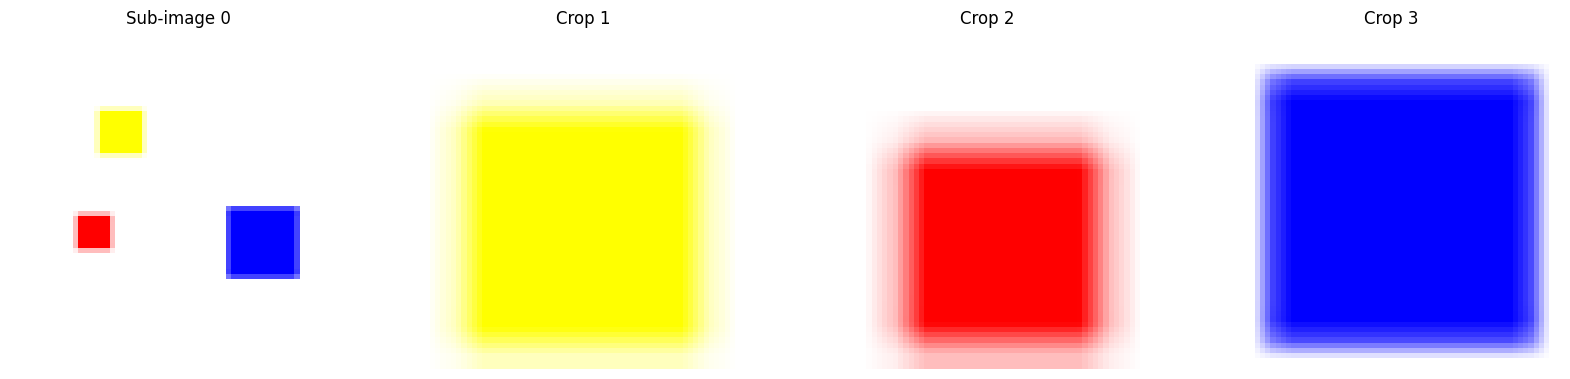

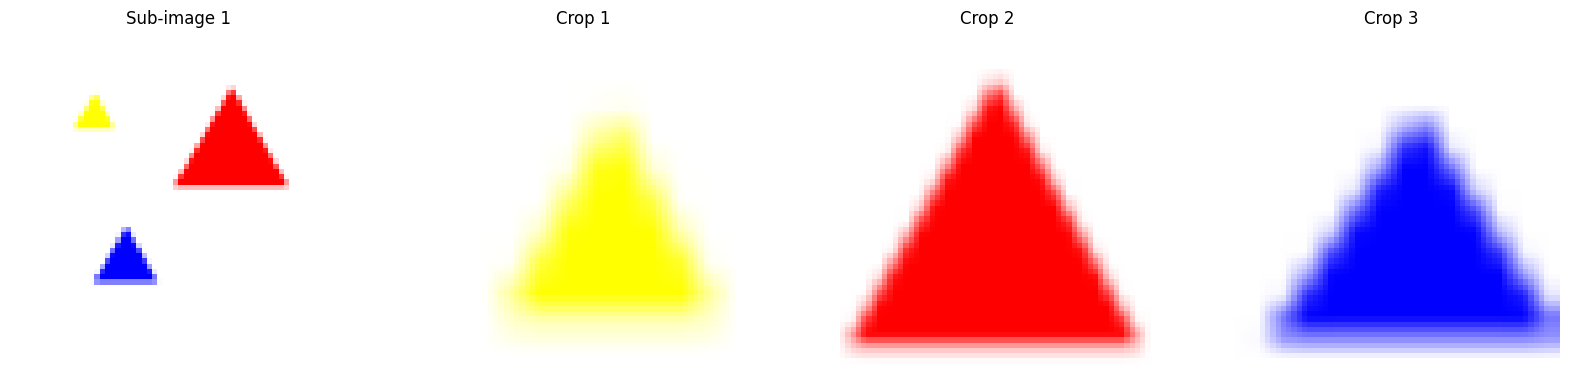

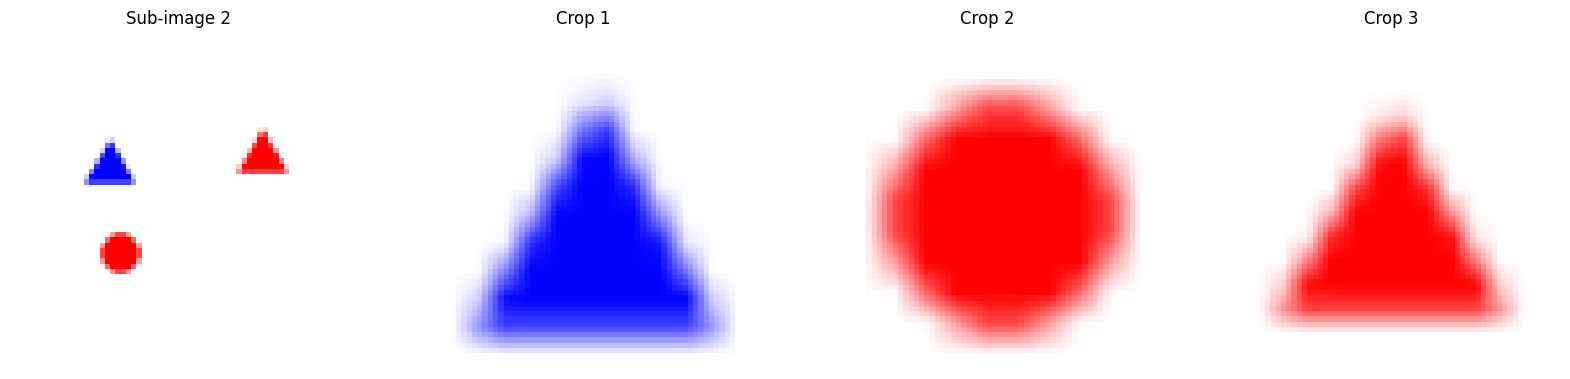

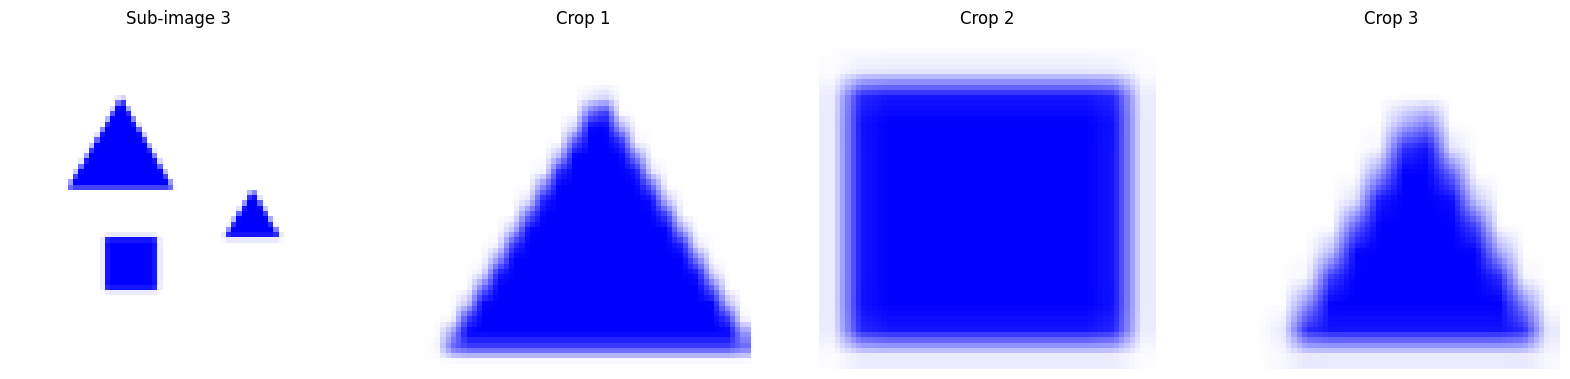

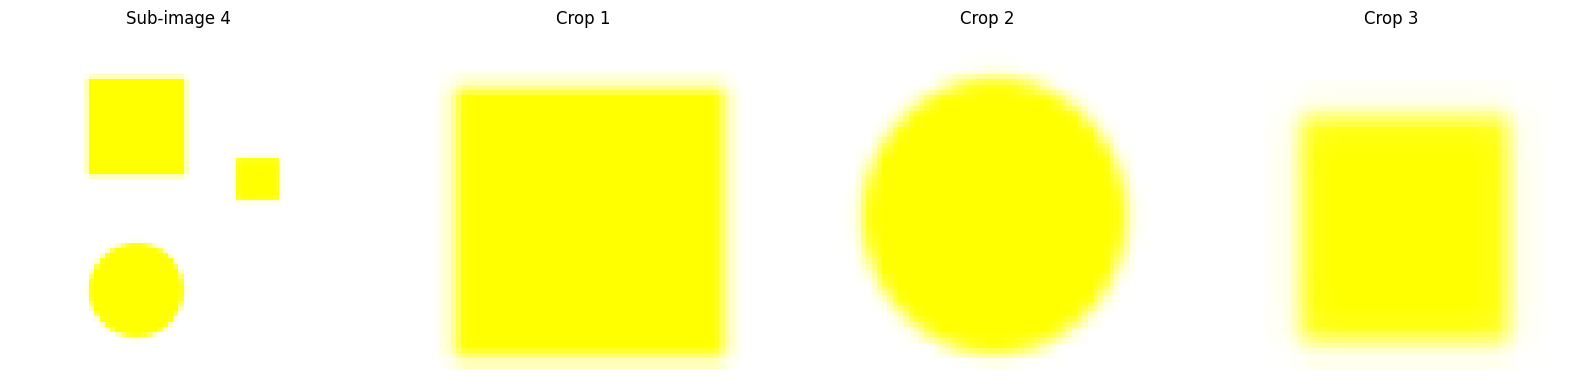

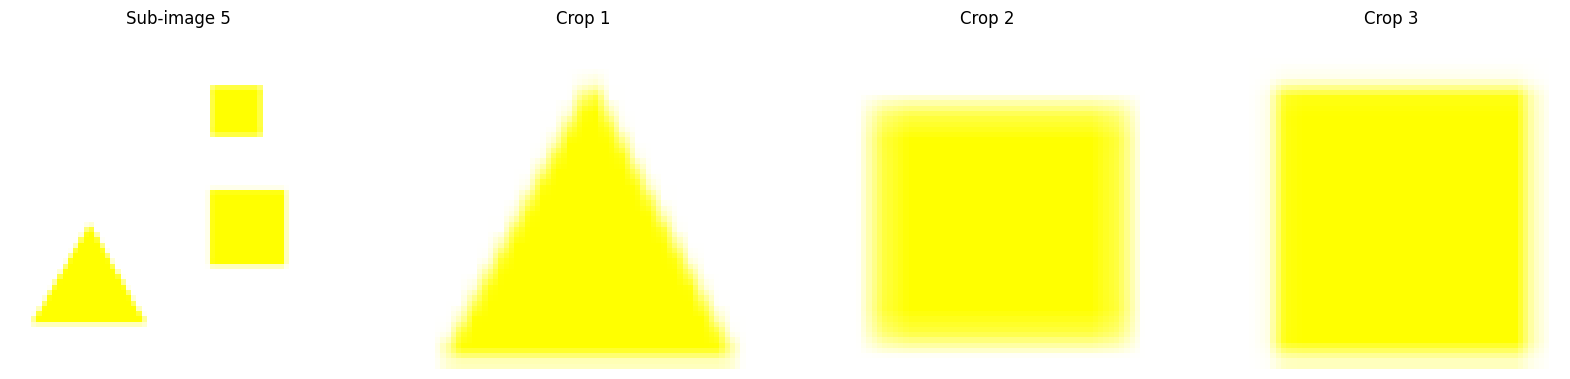

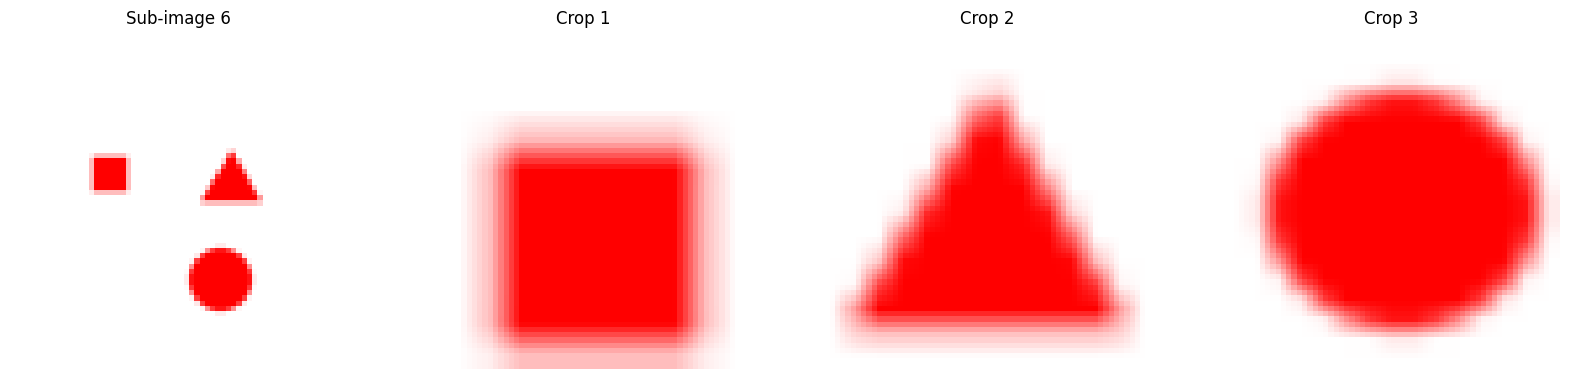

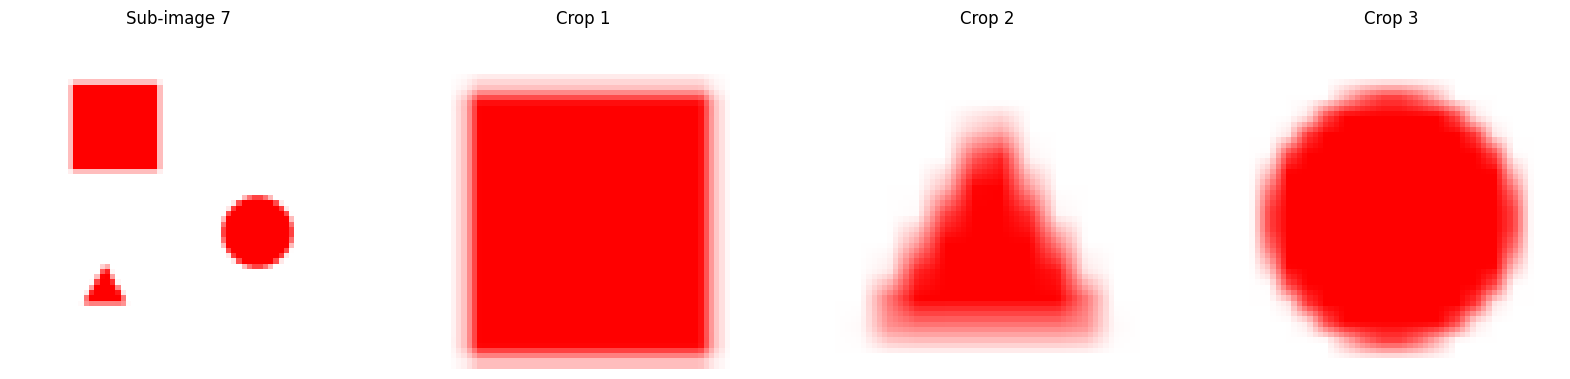

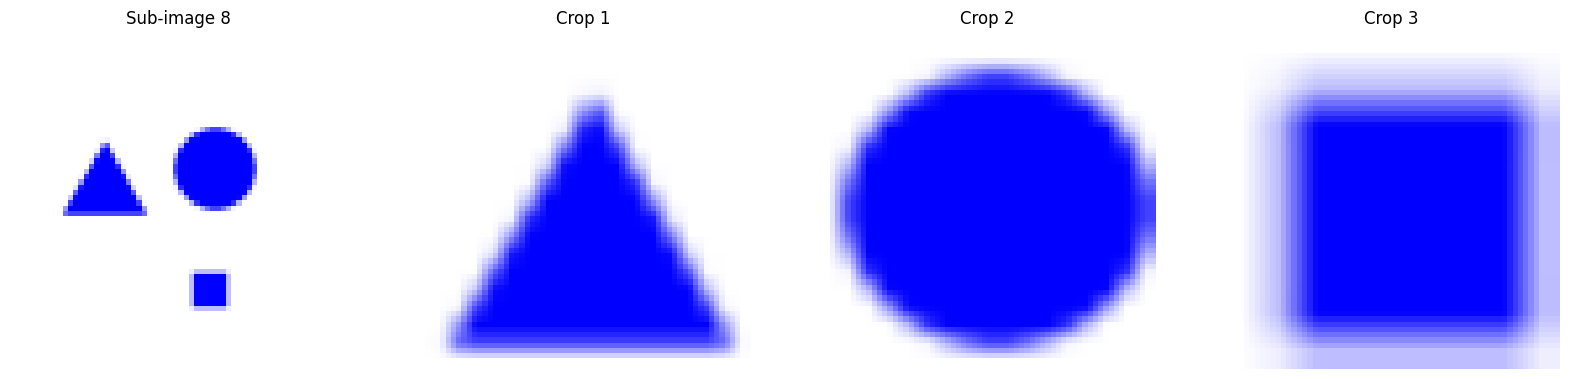

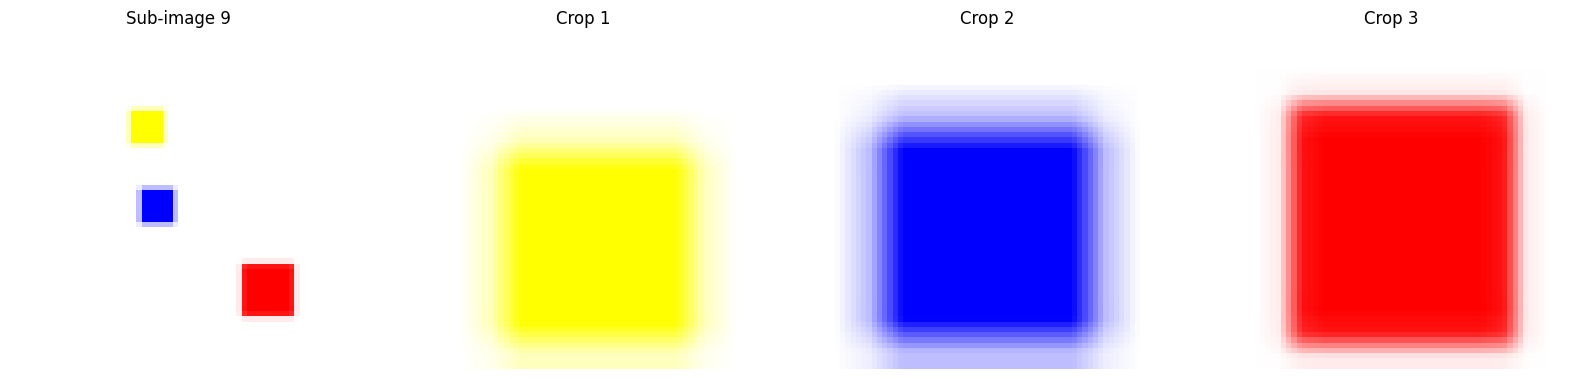

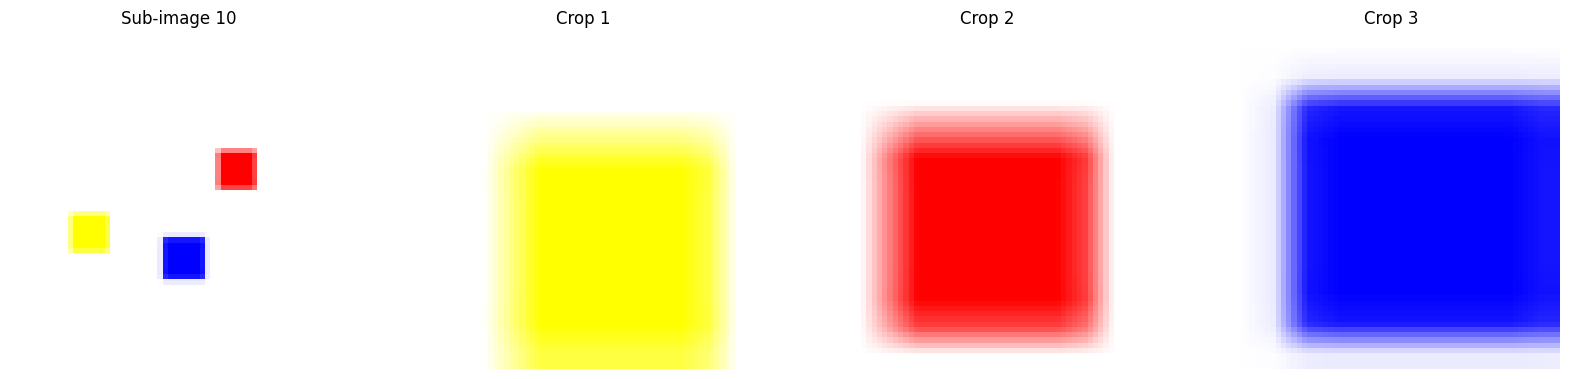

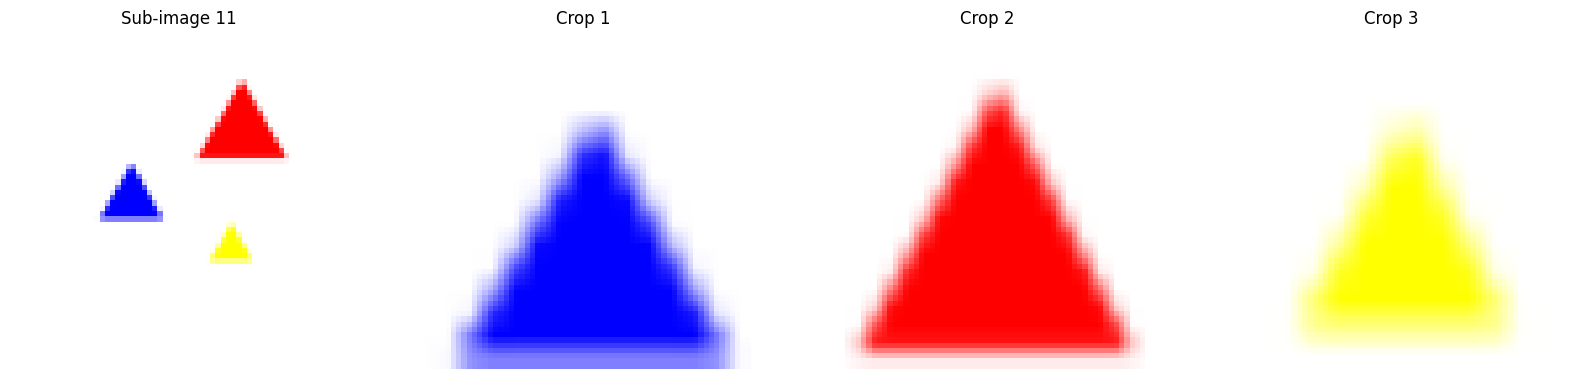

In [7]:
train_loader, _, _ = kand_dataset.get_data_loaders()
resize_transform = T.Resize((64, 64))
images_dict = {}
images_processed = 0
max_images = 10 

for batch_idx, data in enumerate(train_loader):
    images, _, _ = data
    batch_size = images.shape[0]
    
    for b in range(batch_size):
        if images_processed >= max_images:
            break
        
        current_image = images[b]
        sub_images = [current_image[:, :, i:i+64] for i in range(0, 192, 64)]

        for sub_idx, sub_img in enumerate(sub_images):
            if images_processed * 3 + sub_idx >= 12:
                break

            img_resized = resize_transform(sub_img)  
            max_attempts = 10  # maximum retries to prevent an infinite loop
            attempt = 0
            while attempt < max_attempts:
                results = model.predict(img_resized.unsqueeze(0))
                cropped_objects = []

                for result in results:
                    boxes = sorted(result.boxes.xyxy, key=lambda box: (box[0]**2 + box[1]**2)**0.5)
                    crop_count = 0
                    for box in boxes:
                        if crop_count >= 3:
                            break
                        x1, y1, x2, y2 = map(int, box)
                        x1, y1 = max(0, x1), max(0, y1)
                        x2, y2 = min(64, x2), min(64, y2)

                        if x2 - x1 > 0 and y2 - y1 > 0:
                            cropped_obj = img_resized[:, y1:y2, x1:x2]
                            cropped_obj = resize_transform(cropped_obj)  # Resize back to (64, 64)
                            cropped_objects.append(cropped_obj)
                            assert cropped_obj.shape == (3, 64, 64), f"Expected shape (3, 64, 64), got {cropped_obj.shape}"
                            crop_count += 1

                # If exactly 3 objects are detected, exit the loop
                if len(cropped_objects) == 3:
                    break
                attempt += 1
                print("Detected", len(cropped_objects), "objects. Retrying...")

            # Optionally, if after max_attempts you still don't have 3 crops, you might handle it:
            if len(cropped_objects) != 3:
                print(f"Warning: Detected {len(cropped_objects)} objects after {attempt} attempts. Using current detections.")
            
            images_dict[images_processed * 3 + sub_idx] = {
                "original": img_resized,
                "crops": cropped_objects
            }
        
        images_processed += 1
        
    if images_processed >= max_images:
        break

# Now, plot each sub-image side by side with its cropped objects
for idx, content in images_dict.items():
    orig = content["original"]
    crops_list = content["crops"]
    num_plots = 1 + len(crops_list)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
    
    if num_plots == 1:  # Handle case with no detected crops
        axes = [axes]

    # Plot the original sub-image
    axes[0].imshow(orig.permute(1, 2, 0))
    axes[0].set_title(f"Sub-image {idx}")
    axes[0].axis("off")

    # Plot each cropped object
    for i, crop in enumerate(crops_list):
        axes[i + 1].imshow(crop.permute(1, 2, 0))
        axes[i + 1].set_title(f"Crop {i + 1}")
        axes[i + 1].axis("off")

    plt.show()